In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_classification
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
x, y = make_classification(n_samples = 10000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
x, y

(array([[-0.83451974,  0.67903054],
        [-1.60011136,  2.93816401],
        [-1.40113621, -1.22567119],
        ...,
        [-1.45403666, -0.9413914 ],
        [-1.69543235,  2.90339908],
        [-1.69445045, -0.78812389]]),
 array([1, 1, 0, ..., 0, 1, 0]))

<Axes: xlabel='0', ylabel='1'>

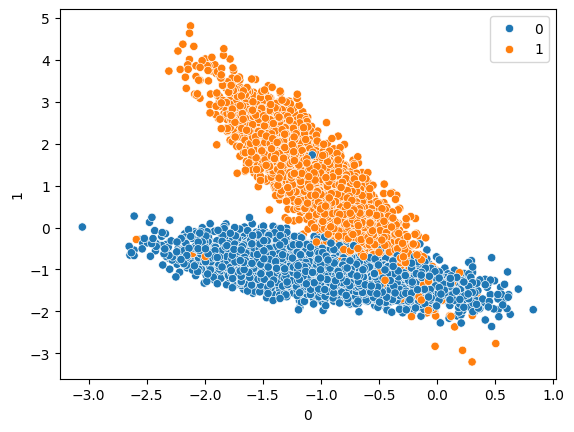

In [3]:
sb.scatterplot(x = 0, y = 1, data = pd.DataFrame(x), hue = y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

### By default there is RBF kernel


In [5]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)


SVC(kernel='linear')

In [6]:
pred = svc.predict(x_test)

In [7]:
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(score, '\n', cm)
print(classification_report(y_test, pred))

0.9596 
 [[1216   20]
 [  81 1183]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1236
           1       0.98      0.94      0.96      1264

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



### Overlapping data

In [8]:
x, y = make_classification(n_samples = 10000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)
x, y

(array([[-2.63605068, -2.51092905],
        [ 1.01274565, -0.62216226],
        [ 1.0018861 ,  1.21445469],
        ...,
        [-1.13934088,  0.5073681 ],
        [-1.37841765,  2.31811866],
        [-0.86072348,  0.57974898]]),
 array([0, 1, 1, ..., 0, 0, 1]))

<Axes: xlabel='0', ylabel='1'>

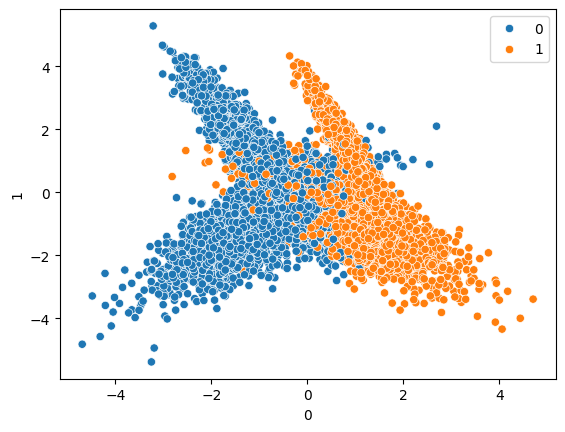

In [9]:
sb.scatterplot(x = 0, y = 1, data = pd.DataFrame(x), hue = y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [11]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [12]:
pred = svc.predict(x_test)

In [13]:
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(score, '\n', cm)
print(classification_report(y_test, pred))

0.9104 
 [[1153   94]
 [ 130 1123]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1247
           1       0.92      0.90      0.91      1253

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



### Now we do it with rbf kernel
(Takes the data in a 3d plane)

In [14]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(score, '\n', cm)
print(classification_report(y_test, pred))

0.9128 
 [[1175   72]
 [ 146 1107]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1247
           1       0.94      0.88      0.91      1253

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



### Polynomial kernel

In [15]:
svc = SVC(kernel='poly')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(score, '\n', cm)
print(classification_report(y_test, pred))

0.8864 
 [[1209   38]
 [ 246 1007]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1247
           1       0.96      0.80      0.88      1253

    accuracy                           0.89      2500
   macro avg       0.90      0.89      0.89      2500
weighted avg       0.90      0.89      0.89      2500



### Sigmoid

In [16]:
svc = SVC(kernel='sigmoid')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(score, '\n', cm)
print(classification_report(y_test, pred))

0.7712 
 [[960 287]
 [285 968]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1247
           1       0.77      0.77      0.77      1253

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



## Now we perform a GridSearch

In [17]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.01, 0.1, 1, 10, 100]
gamma = [10, 1, 0.1, 0.01, 0.001]

params = dict(kernel = kernel, C = c_values, gamma = gamma)
params

{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
 'C': [0.01, 0.1, 1, 10, 100],
 'gamma': [10, 1, 0.1, 0.01, 0.001]}

In [18]:
grid = GridSearchCV(estimator=SVC(), param_grid=params, cv = 5, refit = True, verbose = 3)

In [19]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ...C=0.01, gamma=10, kernel=linear;, score=0.905 total time=   0.1s
[CV 2/5] END ...C=0.01, gamma=10, kernel=linear;, score=0.909 total time=   0.1s
[CV 3/5] END ...C=0.01, gamma=10, kernel=linear;, score=0.907 total time=   0.1s
[CV 4/5] END ...C=0.01, gamma=10, kernel=linear;, score=0.911 total time=   0.2s
[CV 5/5] END ...C=0.01, gamma=10, kernel=linear;, score=0.897 total time=   0.1s
[CV 1/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.878 total time=   1.4s
[CV 2/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.885 total time=   1.6s
[CV 3/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.878 total time=   1.5s
[CV 4/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.890 total time=   1.4s
[CV 5/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.881 total time=   1.3s
[CV 1/5] END .....C=0.01, gamma=10, kernel=poly;, score=0.890 total time=   3.2s
[CV 2/5] END .....C=0.01, gamma=10, kernel=pol

KeyboardInterrupt: 

## Support vector Regressor 

In [20]:
data = sb.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [22]:
data['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [23]:
data['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [24]:
data['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [25]:
data['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

## Feature Encoding

In [26]:
x = data.drop('total_bill', axis=1)
y = data['total_bill']
x, y

(      tip     sex smoker   day    time  size
 0    1.01  Female     No   Sun  Dinner     2
 1    1.66    Male     No   Sun  Dinner     3
 2    3.50    Male     No   Sun  Dinner     3
 3    3.31    Male     No   Sun  Dinner     2
 4    3.61  Female     No   Sun  Dinner     4
 ..    ...     ...    ...   ...     ...   ...
 239  5.92    Male     No   Sat  Dinner     3
 240  2.00  Female    Yes   Sat  Dinner     2
 241  2.00    Male    Yes   Sat  Dinner     2
 242  1.75    Male     No   Sat  Dinner     2
 243  3.00  Female     No  Thur  Dinner     2
 
 [244 rows x 6 columns],
 0      16.99
 1      10.34
 2      21.01
 3      23.68
 4      24.59
        ...  
 239    29.03
 240    27.18
 241    22.67
 242    17.82
 243    18.78
 Name: total_bill, Length: 244, dtype: float64)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, y_train.shape

((195, 6), (195,))

In [28]:
l1= LabelEncoder()
l2= LabelEncoder()
l3= LabelEncoder()

x_train['sex'] = l1.fit_transform(x_train['sex'])
x_train['smoker'] = l2.fit_transform(x_train['smoker'])
x_train['time'] = l3.fit_transform(x_train['time'])

In [29]:
x_train

,tip,sex,smoker,day,time,size
228,2.72,1,0,Sat,0,2
208,2.03,1,1,Sat,0,2
96,4.00,1,1,Fri,0,2
167,4.50,1,0,Sun,0,4
84,2.03,1,0,Thur,1,2
...,...,...,...,...,...,...
106,4.06,1,1,Sat,0,2
14,3.02,0,0,Sun,0,2
92,1.00,0,1,Fri,0,2
179,3.55,1,1,Sun,0,2


In [30]:
x_test['sex'] = l1.transform(x_test['sex'])
x_test['smoker'] = l2.transform(x_test['smoker'])
x_test['time'] = l3.transform(x_test['time'])

In [32]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), [3])], remainder="passthrough") # Here [3] means that we want this one hot encoding for column of index 3 which is day
## passthrough here means that not to delete the other columns of the dataframe(if we write remainder = 'drop' then it will delete the other columns)

In [35]:
import sys

np.set_printoptions(threshold=sys.maxsize)
x_train = ct.fit_transform(x_train)

In [36]:
x_test = ct.transform(x_test)

In [38]:
reg_svr = SVR()
reg_svr.fit(x_train, y_train)


SVR()

In [43]:
pred = reg_svr.predict(x_test)

score = r2_score(y_test, pred)
score

0.5513989822828735